In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

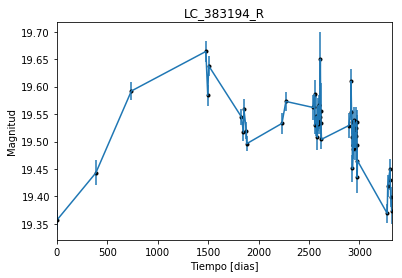

In [2]:
data = np.genfromtxt('LC_383194_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_383194_R')
plt.savefig("LC_383194_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

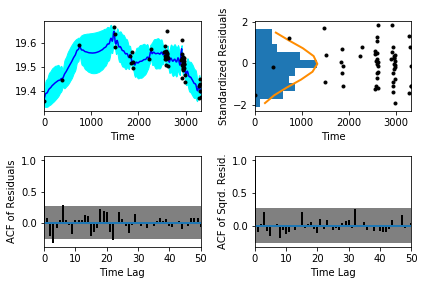

In [5]:
sample.assess_fit()

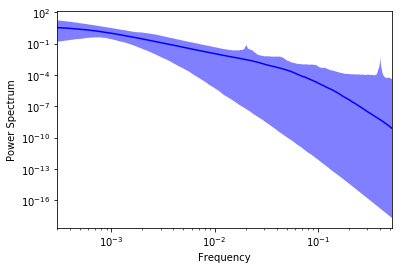

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

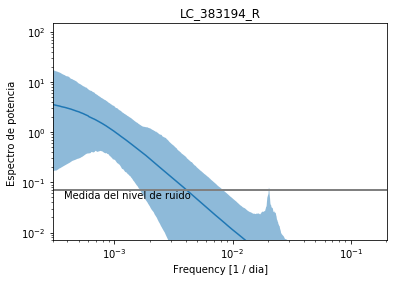

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_383194_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_383194_R')

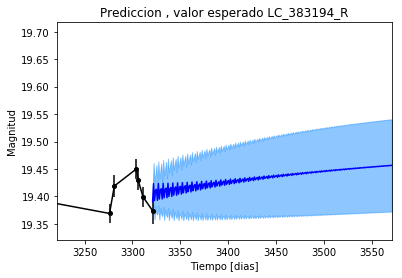

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_383194_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_383194_R')

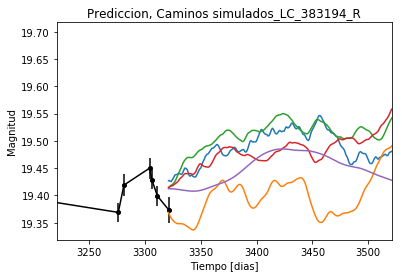

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_383194_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


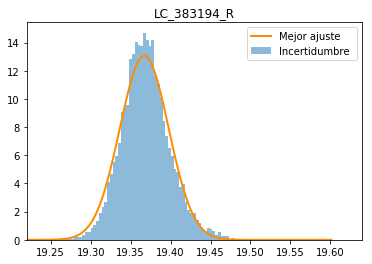

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_383194_R')
plt.savefig("Mejor_ajuste_LC_383194_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_383194_R')

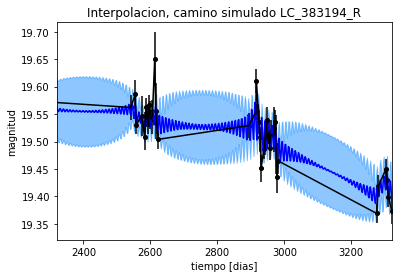

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_R')

Text(0.5,1,'Interpolacion, camino simulado LC_383194_R')

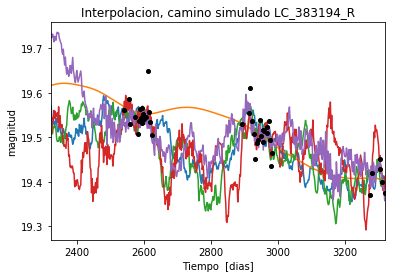

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 356.463885538
Median: 0.0114933242036
Standard deviation: 0.192091459002
68% credibility interval: [ 0.00098668  0.16606022]
95% credibility interval: [  3.44271858e-04   7.56387367e-01]
99% credibility interval: [  3.12454758e-04   9.40454613e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 540.780812126
Median: 0.0051788131603
Standard deviation: 0.113576122018
68% credibility interval: [ 0.00054796  0.06231433]
95% credibility interval: [  3.21383467e-04   4.06593546e-01]
99% credibility interval: [  3.05845637e-04   7.58892305e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 487.265009116
Median: 0.0699281572452
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 774.573369455
Median: 119.673019795
Standard deviation: 2.1254036496
68% credibility interval: [ 117.66582726  121.61998673]
95% credibility interval: [ 115.19223399  123.91968518]
99% credibility interval: [ 113.12711236  124.29190596]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 363.320528481
Median: 1.05338324841
Standard deviation: 2.43171358546
68% credibility interval: [ 0.10787589  4.42490712]
95% credibility interval: [ 0.01873761  8.71448375]
99% credibility interval: [  1.02345079e-02   1.14502828e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 839.676212212
Median: 1.33778218988
Standard deviation: 11.7376158564
68% credibility interval: [  0.03813358  14.13093082]
95% credibility interval: [  2.3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 56579.4721853
Median: 5.76573091728e-14
Standard deviation: 8.08769838873e+116
68% credibility interval: [  1.40466029e-42   1.64588354e+02]
95% credibility interval: [  1.83677092e-78   1.37316547e+89]
99% credibility interval: [  2.61545783e-097   2.40742315e+115]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1307.67554465
Median: 19.5048299292
Standard deviation: 0.0454690453308
68% credibility interval: [ 19.46160311  19.54172991]
95% credibility interval: [ 19.40548915  19.58480792]
99% credibility interval: [ 19.35109828  19.63437251]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 655.390087385
Median: 0.0648258457502
Standard deviation: 0.274299503689
68% credibility interval: [ 0.          0.49767829]
95% credibility interval: [ 0.          0.93942081]
99% credibility interval: [ 0.          1.01852997]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 655.390087385
Median: 0.0648258457502
Standard deviation: 0.274299503689
68% credibility interval: [ 0.          0.49767829]
95% credibility interval: [ 0.          0.93942081]
99% credibility interval: [ 0.          1.01852997]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 786.934354169
Median: 0.0
Standard deviation: 0.000422070419002
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 774.573369455
Median: 119.673019795
Standard deviation: 2.1254036496
68% credibility interval: [ 117.66582726  121.61998673]
95% credibility interval: [ 115.19223399  123.91968518]
99% credibility interval: [ 113.12711236  124.29190596]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1298.71769319
Median: 0.00836898889042
Standard deviation: 0.00779248502587
68% credibility interval: [ 0.00533499  0.01447505]
95% credibility interval: [ 0.00358336  0.0291016 ]
99% credibility interval: [ 0.00281283  0.05034934]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 583.866667782
Median: 1.19328175285
Standard deviation: 0.25879872251
68% credibility interval: [ 0.96133592  1.50002912]
95% credibility interval: [ 0.80402364  1.80738728]
99% credibility interval: [ 0.72898985  1.94983181]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 562.993173651
Median: 0.000331500005814
Standard deviation: 0.204662706927
68% credibility interval: [  2.04469041e-08   3.59009722e-02]
95% credibility interval: [  4.87941539e-95   6.53184106e-01]
99% credibility interval: [  3.06879624e-117   1.41898231e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 356.463885538
Median: (-0.0722146857665-0.369951353087j)
Standard deviation: 2.10406367416
68% credibility interval: [-1.04338713-3.99260001j -0.00619949-2.91609859j]
95% credibility interval: [ -4.75252199e+00+0.j         -2.16312388e-03-0.1439083j]
99% credibility interval: [ -5.90905060e+00+0.j          -1.96321115e-03-0.00173125j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 540.780812126
Median: (-0.0325394427574+0.669087059851j)
Standard deviation: 1.86537341705
68% credibility interval: [-0.39153246+2.07643254j -0.00344295+0.j        ]
95% credibility interval: [ -2.55470259e+00+3.83645879j  -2.01931188e-03+0.16094882j]
99% credibility interval: [ -4.76826098e+00+1.52786433j  -1.92168481e-03+0.j        ]
Post